0.<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Capstone - Prediction Tour Package Sales (Preprocessing)

## 1. Introduction

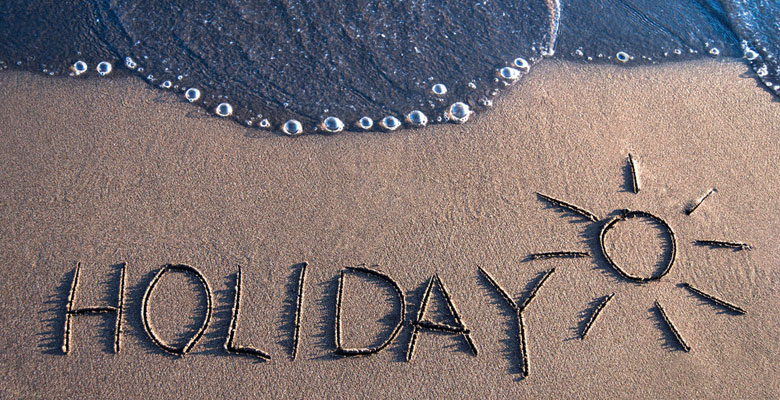

##### Data source: https://www.kaggle.com/susant4learning/holiday-package-purchase-prediction

Problem Overview:

Which group of customer should be targeted to improve the market efficiency?

How likely the customer will purchase the product?

### Import code



## 2. Data Overview & Preprocessing

### 2.1 Import Libraries

In [1]:
# data processing
import numpy as np
import pandas as pd

# data representation
from dataprep.eda import create_report
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from dataprep.eda import plot

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (15, 9)})
sns.set_style("darkgrid")

# setting max. number of core used in environment
NUMEXPR_MAX_THREADS=12

import warnings
warnings.filterwarnings('ignore')

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


### 2.2 Import Data

In [2]:
# read csv
travel_csv = "Data/travel.csv"
data = pd.read_csv(travel_csv)

### 2.3 Data Processing

In [3]:
# data preprocessing
# replace columns name that with ' ' to '_'
data.columns = data.columns.str.replace(' ', '_')

# corrected spelling error in columns 'gender'
data['Gender'].replace(['Fe Male'], 'Female', inplace = True)

# eliminate duplicates
data.loc[data.duplicated(keep=False),:]
data.drop_duplicates(keep='first',inplace=True)

#drop unuseful columns
data = data.drop(['Customer_ID'],axis=1)

In [4]:
# check initial shape
data.shape

(4888, 19)

In [5]:
# check null value
data.isnull().sum()

Product_Taken                    0
Age                            226
Type_of_Contact                 25
City_Tier                        0
Duration_of_Pitch              251
Occupation                       0
Gender                           0
Number_of_Person_Visiting        0
Number_of_Followups             45
Product_Pitched                  0
Preferred_Property_Star         26
Marital_Status                   0
Number_of_Trips                140
Passport                         0
Pitch_Satisfaction_Score         0
Own_Car                          0
Number_of_Children_Visiting     66
Designation                      0
Monthly_Income                 233
dtype: int64

In [6]:
# fill null value with means value
data = data.fillna(data.median())
data = data.dropna()

In [7]:
#check variables - count unique values
data.nunique().sort_values(ascending = False)

Monthly_Income                 2475
Age                              44
Duration_of_Pitch                34
Number_of_Trips                  12
Number_of_Followups               6
Designation                       5
Pitch_Satisfaction_Score          5
Product_Pitched                   5
Number_of_Person_Visiting         5
Marital_Status                    4
Occupation                        4
Number_of_Children_Visiting       4
Preferred_Property_Star           3
City_Tier                         3
Gender                            2
Passport                          2
Own_Car                           2
Type_of_Contact                   2
Product_Taken                     2
dtype: int64

In [8]:
#check variables - Numeric
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Taken,4863.0,0.188567,0.391204,0.0,0.0,0.0,0.0,1.0
Age,4863.0,37.585647,9.104766,18.0,31.0,36.0,43.0,61.0
City_Tier,4863.0,1.654329,0.916498,1.0,1.0,1.0,3.0,3.0
Duration_of_Pitch,4863.0,15.375077,8.335788,5.0,9.0,13.0,19.0,127.0
Number_of_Person_Visiting,4863.0,2.908081,0.724762,1.0,2.0,3.0,3.0,5.0
Number_of_Followups,4863.0,3.713346,0.996539,1.0,3.0,4.0,4.0,6.0
Preferred_Property_Star,4863.0,3.578655,0.796907,3.0,3.0,3.0,4.0,5.0
Number_of_Trips,4863.0,3.231339,1.822589,1.0,2.0,3.0,4.0,22.0
Passport,4863.0,0.292412,0.454917,0.0,0.0,0.0,1.0,1.0
Pitch_Satisfaction_Score,4863.0,3.079581,1.366446,1.0,2.0,3.0,4.0,5.0


In [9]:
# create new columns for age group [1:>30, 2:30-39, 3:40-49, 4:50-59, 5:>59 ]
conditions = [
    (data['Age'] < 30),
    (data['Age'].between(30, 39)),
    (data['Age'].between(40, 49)),
    (data['Age'].between(50, 59)),
    (data['Age'] > 59 ) ]

choices = [1, 2, 3, 4, 5]

data['Age_Group'] = np.select(conditions, choices, default='null')


# create new columns for income group [1:<1k, 2:10k-20k, 3:20k-30k, 4:30k-40k, 5:>40k]
conditions = [
    (data['Monthly_Income'] < 10000),
    (data['Monthly_Income'].between(10000, 19999)),
    (data['Monthly_Income'].between(20000, 29999)),
    (data['Monthly_Income'].between(30000, 39999)),
    (data['Monthly_Income'] > 39999 ) ]

choices = [1, 2, 3, 4, 5]

data['Income_Group'] = np.select(conditions, choices, default='null')

In [10]:
print('Outliers-Number-Trips:', len(data[data['Number_of_Trips'] < 9]))

Outliers-Number-Trips: 4859


In [11]:
# spotted one big outlier '127' at Duration_of_Pitch & '98678' at Monthly_Income
# check the quantity of outliers
print('Outliers-Pitch Duration:', len(data[data['Duration_of_Pitch'] > 100]))
print('Outliers-Income:', len(data) - len(data[data['Monthly_Income'].between(5000, 40000)]))
print('Outliers-Number-Trips:', len(data[data['Number_of_Trips'] > 8]))

# remove the outliers as each of them only have two values
data = data[data['Duration_of_Pitch'] < 100]
data = data[data['Monthly_Income'].between(5000, 40000)]
data = data[data['Number_of_Trips'] < 9]

Outliers-Pitch Duration: 2
Outliers-Income: 4
Outliers-Number-Trips: 4


In [12]:
# check new null value
data.isnull().sum()

Product_Taken                  0
Age                            0
Type_of_Contact                0
City_Tier                      0
Duration_of_Pitch              0
Occupation                     0
Gender                         0
Number_of_Person_Visiting      0
Number_of_Followups            0
Product_Pitched                0
Preferred_Property_Star        0
Marital_Status                 0
Number_of_Trips                0
Passport                       0
Pitch_Satisfaction_Score       0
Own_Car                        0
Number_of_Children_Visiting    0
Designation                    0
Monthly_Income                 0
Age_Group                      0
Income_Group                   0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4853 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Product_Taken                4853 non-null   int64  
 1   Age                          4853 non-null   float64
 2   Type_of_Contact              4853 non-null   object 
 3   City_Tier                    4853 non-null   int64  
 4   Duration_of_Pitch            4853 non-null   float64
 5   Occupation                   4853 non-null   object 
 6   Gender                       4853 non-null   object 
 7   Number_of_Person_Visiting    4853 non-null   int64  
 8   Number_of_Followups          4853 non-null   float64
 9   Product_Pitched              4853 non-null   object 
 10  Preferred_Property_Star      4853 non-null   float64
 11  Marital_Status               4853 non-null   object 
 12  Number_of_Trips              4853 non-null   float64
 13  Passport          

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Taken,4853.0,0.188543,0.391186,0.0,0.0,0.0,0.0,1.0
Age,4853.0,37.584999,9.110142,18.0,31.0,36.0,43.0,61.0
City_Tier,4853.0,1.654853,0.916650,1.0,1.0,1.0,3.0,3.0
Duration_of_Pitch,4853.0,15.335257,8.031568,5.0,9.0,13.0,19.0,36.0
Number_of_Person_Visiting,4853.0,2.908510,0.724864,1.0,2.0,3.0,3.0,5.0
Number_of_Followups,4853.0,3.713373,0.997142,1.0,3.0,4.0,4.0,6.0
Preferred_Property_Star,4853.0,3.579023,0.797118,3.0,3.0,3.0,4.0,5.0
Number_of_Trips,4853.0,3.217185,1.754812,1.0,2.0,3.0,4.0,8.0
Passport,4853.0,0.291778,0.454628,0.0,0.0,0.0,1.0,1.0
Pitch_Satisfaction_Score,4853.0,3.080157,1.366166,1.0,2.0,3.0,4.0,5.0


In [15]:
data.shape

(4853, 21)

## 3. Export Data to CSV File

In [16]:
data.to_csv('Data/travel_cleaned.csv', index=False)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



